#1.Importing libraries


In [ ]:
pip install tensorflow==2.0.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [70]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD
import warnings
warnings.filterwarnings('ignore')

In [7]:
!dir

drive  sample_data


In [8]:
os.chdir('/content/drive/MyDrive/Deep Learning/4.ann stock price pred')

In [9]:
!dir

data.csv       Neural\ Network\ for\ Regression.ipynb
gitprac.ipynb  Neural\ Network_Problem\ Statement.pdf


In [10]:
df=pd.read_csv('data.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-27,9982.179688,10159.879883,9936.620117,10150.650391,10150.650391,207760000
1,2010-08-30,10145.580078,10150.570313,10007.679688,10009.730469,10009.730469,150480000
2,2010-08-31,10006.419922,10073.379883,9941.839844,10014.719727,10014.719727,255420000
3,2010-09-01,10016.009766,10279.080078,10016.009766,10269.469727,10269.469727,205710000
4,2010-09-02,10270.080078,10320.370117,10253.959961,10320.099609,10320.099609,149930000


In [11]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2009,2018-08-21,25786.990234,25888.820313,25784.900391,25822.289063,25822.289063,241620000
2010,2018-08-22,25825.060547,25836.160156,25722.429688,25733.599609,25733.599609,200480000
2011,2018-08-23,25714.859375,25762.560547,25608.019531,25656.980469,25656.980469,213270000
2012,2018-08-24,25688.580078,25826.050781,25688.580078,25790.349609,25790.349609,200330000
2013,2018-08-27,25882.710938,26067.570313,25882.710938,26049.640625,26049.640625,220510000


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,16756.880170,16835.962791,16676.660195,16762.755255,16762.755255,1.699523e+08
std,3985.884743,3992.888506,3977.350484,3984.242430,3984.242430,1.072222e+08
min,9982.179688,10073.379883,9936.620117,10009.730469,10009.730469,8.410000e+06
25%,13104.239746,13175.674805,13045.425049,13107.277588,13107.277588,9.486500e+07
50%,16566.544922,16652.890625,16500.360352,16571.265625,16571.265625,1.284750e+08
75%,18282.699219,18350.062988,18205.062500,18287.908203,18287.908203,2.177400e+08
max,26584.279297,26616.710938,26435.339844,26616.710938,26616.710938,8.239400e+08


In [13]:
df.shape

(2014, 7)

In [17]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2014 non-null   object 
 1   Open       2014 non-null   float64
 2   High       2014 non-null   float64
 3   Low        2014 non-null   float64
 4   Close      2014 non-null   float64
 5   Adj Close  2014 non-null   float64
 6   Volume     2014 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.3+ KB


In [20]:
df['Date'].dtype

dtype('O')

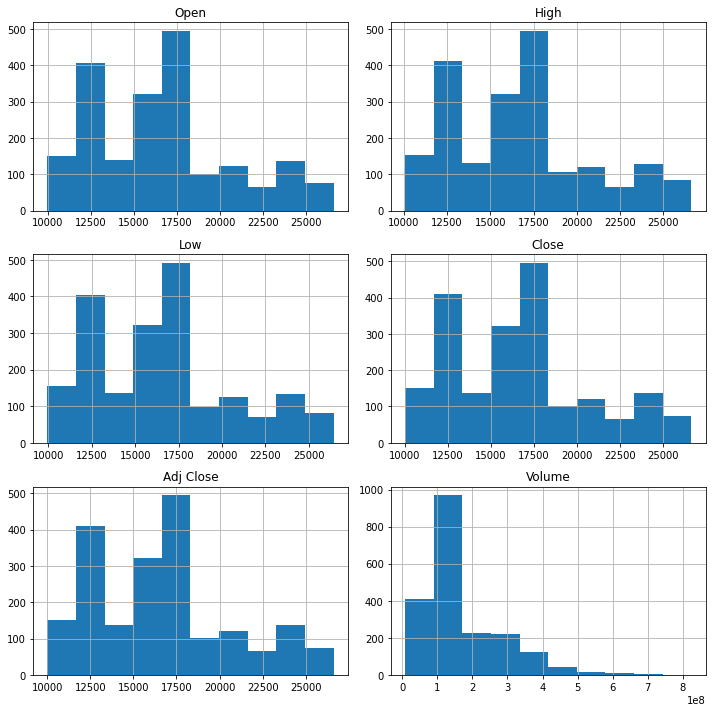

In [24]:
df.hist(figsize=[10,10])
plt.tight_layout()
plt.show()

In [48]:
col=df.columns.values
col

array(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype=object)

In [49]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

##Splitting features and target variables

In [52]:
x=df.drop(['Date','Close'],axis=1)
x.head()

,Open,High,Low,Adj Close,Volume
0,9982.179688,10159.879883,9936.620117,10150.650391,207760000
1,10145.580078,10150.570313,10007.679688,10009.730469,150480000
2,10006.419922,10073.379883,9941.839844,10014.719727,255420000
3,10016.009766,10279.080078,10016.009766,10269.469727,205710000
4,10270.080078,10320.370117,10253.959961,10320.099609,149930000


In [53]:
y=df.iloc[:,4]
y.head()

0    10150.650391
1    10009.730469
2    10014.719727
3    10269.469727
4    10320.099609
Name: Close, dtype: float64

#2.Standardizinfg DataFRame

In [54]:
#intatiating the object
scale=StandardScaler()


In [55]:
#fitting the scale
df_scale=scale.fit_transform(x)

In [56]:
df_scale

array([[-1.70009507, -1.67240857, -1.69502638, -1.65997605,  0.35269814],
       [-1.65909013, -1.67474068, -1.67715589, -1.69535415, -0.1816524 ],
       [-1.69401204, -1.69407746, -1.69371369, -1.69410159,  0.79730615],
       ...,
       [ 2.24798371,  2.23617932,  2.24611271,  2.23290482,  0.40409953],
       [ 2.24138898,  2.2520841 ,  2.26637257,  2.26638729,  0.28338556],
       [ 2.29010566,  2.31258655,  2.31519378,  2.33148258,  0.47163964]])

In [57]:
feature=pd.DataFrame(data=df_scale,columns=x.columns.values)

In [58]:
feature

,Open,High,Low,Adj Close,Volume
0,-1.700095,-1.672409,-1.695026,-1.659976,0.352698
1,-1.659090,-1.674741,-1.677156,-1.695354,-0.181652
2,-1.694012,-1.694077,-1.693714,-1.694102,0.797306
3,-1.691605,-1.642548,-1.675061,-1.630146,0.333574
4,-1.627847,-1.632205,-1.615220,-1.617436,-0.186783
...,...,...,...,...,...
2009,2.266085,2.267808,2.290596,2.274406,0.668569
2010,2.275638,2.254617,2.274885,2.252140,0.284785
2011,2.247984,2.236179,2.246113,2.232905,0.404100
2012,2.241389,2.252084,2.266373,2.266387,0.283386


#3.Train Test Split

In [59]:
x_train, x_test, y_train, y_test= train_test_split(feature,y,test_size=0.20,random_state=50)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1611, 5)
(1611,)
(403, 5)
(403,)


#4.Creating ANN model

##4.1. Compiling the model

In [83]:
#instantiating the model
model=Sequential()


In [84]:
#adding layers of perceptron in the model
model.add(Dense(input_shape=(5,),units=256,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=64,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=1,activation='linear',kernel_initializer='normal'))


In [85]:
#compiling the model
model.compile(loss="mean_squared_error",metrics=['mean_absolute_error'],optimizer='Adam')

In [86]:
#checking summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               1536      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 42,753
Trainable params: 42,753
Non-trainable params: 0
_________________________________________________________________


##4.2.Fitting the model


In [87]:
H=model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=30,epochs=300)

Train on 1611 samples, validate on 403 samples
Epoch 1/300
1611/1611 [==============================] - 0s 114us/sample - loss: 295598496.4171 - mean_absolute_error: 16724.4160 - val_loss: 298599356.8238 - val_mean_absolute_error: 16825.5352
Epoch 2/300
1611/1611 [==============================] - 0s 56us/sample - loss: 279234144.9832 - mean_absolute_error: 16255.1660 - val_loss: 249433625.2903 - val_mean_absolute_error: 15378.4443
Epoch 3/300
1611/1611 [==============================] - 0s 75us/sample - loss: 165193756.2756 - mean_absolute_error: 12048.1553 - val_loss: 79730274.1439 - val_mean_absolute_error: 7588.9810
Epoch 4/300
1611/1611 [==============================] - 0s 70us/sample - loss: 50113106.2793 - mean_absolute_error: 6015.8921 - val_loss: 33226149.7022 - val_mean_absolute_error: 5095.2080
Epoch 5/300
1611/1611 [==============================] - 0s 71us/sample - loss: 24194984.9199 - mean_absolute_error: 4330.5020 - val_loss: 14925111.3623 - val_mean_absolute_error: 34

##4.3.Predicting the output

In [105]:
y_pred=model.predict(x_test)

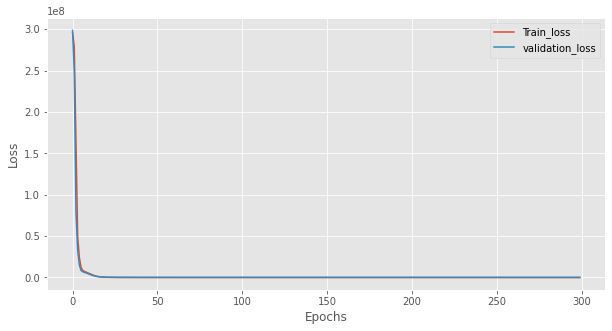

In [106]:
ax=np.arange(0,300)
plt.subplots(figsize=[10,5])
plt.style.use('ggplot')
plt.plot(ax,H.history['loss'],label='Train_loss')
plt.plot(ax,H.history['val_loss'],label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [107]:
from sklearn.metrics import r2_score

In [109]:
#checking the R_squared
r_sq=r2_score(y_test,y_pred)

In [110]:
r_sq

0.9999906444845434

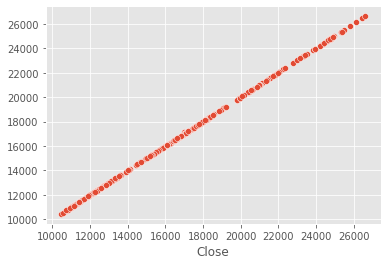

In [149]:
sns.scatterplot(y_test,y_pred[:,0])

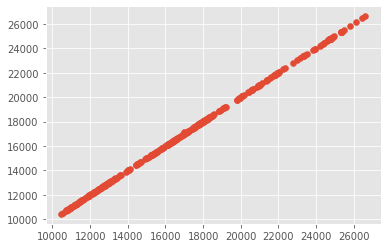

In [139]:
plt.scatter(y_test,y_pred)
plt.show()

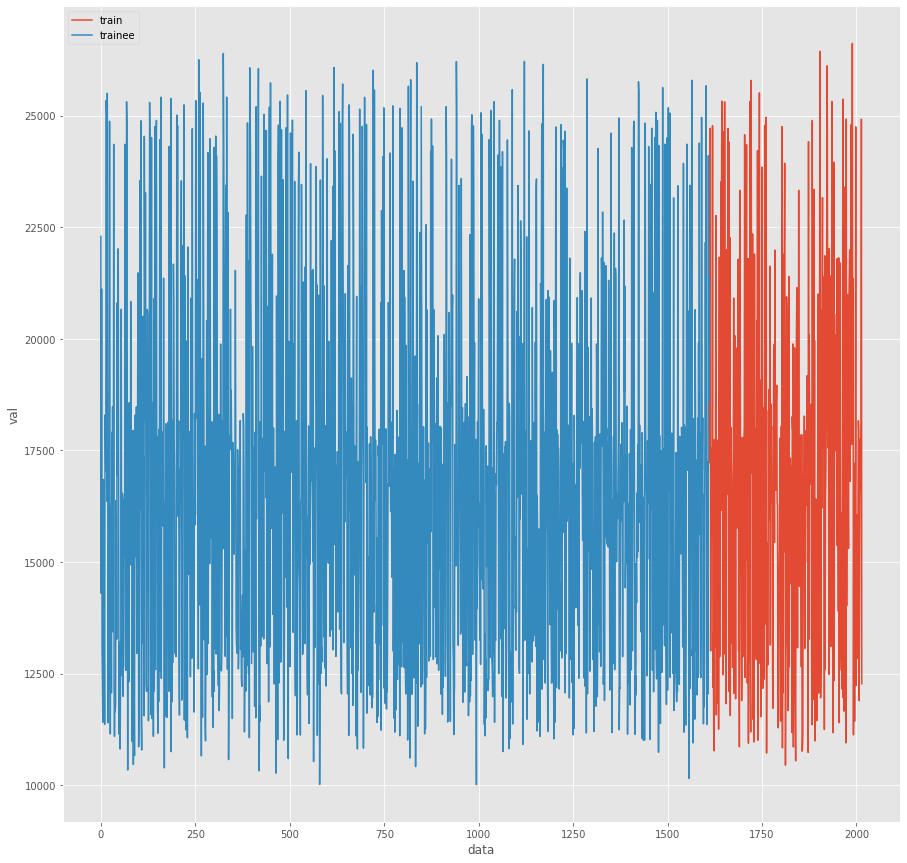

In [158]:
ax=np.arange(1612,2015)
plt.subplots(figsize=[15,15])
plt.style.use('ggplot')
plt.plot(ax,y_test,label='train')
#plt.plot(ax,y_pred,label='pred')
plt.plot(np.arange(0,1611),y_train,label='trainee')
plt.xlabel('data')
plt.ylabel('val')
plt.legend()
plt.show()

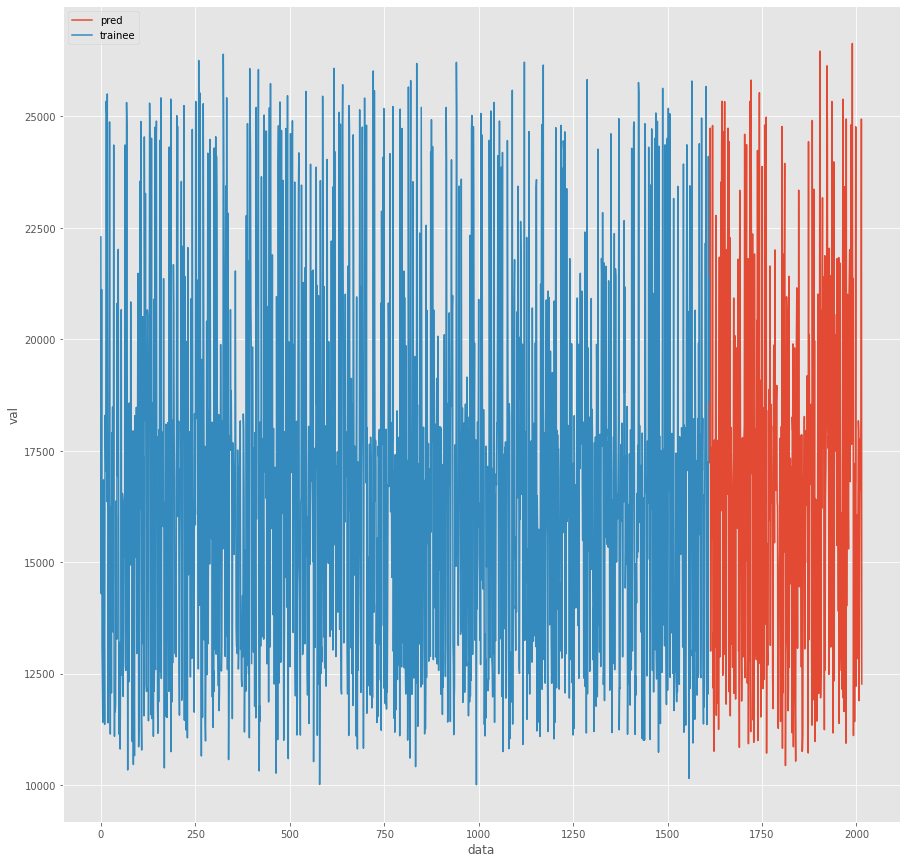

In [159]:
ax=np.arange(1612,2015)
plt.subplots(figsize=[15,15])
plt.style.use('ggplot')
#plt.plot(ax,y_test,label='train')
plt.plot(ax,y_pred,label='pred')
plt.plot(np.arange(0,1611),y_train,label='trainee')
plt.xlabel('data')
plt.ylabel('val')
plt.legend()
plt.show()

In [ ]:
2